In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
seq_length = 20


time_step = np.linspace(0, np.pi, seq_length + 1)
time_step

array([0.        , 0.15707963, 0.31415927, 0.4712389 , 0.62831853,
       0.78539816, 0.9424778 , 1.09955743, 1.25663706, 1.41371669,
       1.57079633, 1.72787596, 1.88495559, 2.04203522, 2.19911486,
       2.35619449, 2.51327412, 2.67035376, 2.82743339, 2.98451302,
       3.14159265])

In [10]:
data = np.sin(time_step)
print(data)
print(data.shape)

[0.00000000e+00 1.56434465e-01 3.09016994e-01 4.53990500e-01
 5.87785252e-01 7.07106781e-01 8.09016994e-01 8.91006524e-01
 9.51056516e-01 9.87688341e-01 1.00000000e+00 9.87688341e-01
 9.51056516e-01 8.91006524e-01 8.09016994e-01 7.07106781e-01
 5.87785252e-01 4.53990500e-01 3.09016994e-01 1.56434465e-01
 1.22464680e-16]
(21,)


In [12]:
data.resize((seq_length + 1, 1))

In [32]:
x = data[:-1]
y = data[1:]

print(x.shape)

(19, 1)


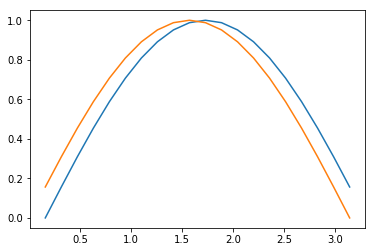

In [19]:
plt.plot(time_step[1:], x)
plt.plot(time_step[1:], y)
plt.show()

In [27]:
class RNN(nn.Module):
    def __init__(self, 
                 input_size, 
                 output_size, 
                 hidden_dim, n_layers):
        
        super().__init__()
        
        self.hidden_dim = hidden_dim
        
        self.rnn = nn.RNN(input_size, 
                          hidden_dim, 
                          n_layers, 
                          batch_first=True)
        
        self.fc = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (layers, batch_size, hidden_dim)
        # r_out (batch_size, seq_length, hidden_dim)
        
        r_out, hidden = self.rnn(x, hidden)
        
        # reshape r_out to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)
        
        output = self.fc(r_out)
        
        return output, hidden

In [28]:
seq_length = 20
time_steps = np.linspace(0, np.pi, seq_length)
print(time_steps)
data = np.sin(time_steps)
data.resize((seq_length, 1))

test_input = torch.Tensor(data).unsqueeze(0)
test_input.size()

[0.         0.16534698 0.33069396 0.49604095 0.66138793 0.82673491
 0.99208189 1.15742887 1.32277585 1.48812284 1.65346982 1.8188168
 1.98416378 2.14951076 2.31485774 2.48020473 2.64555171 2.81089869
 2.97624567 3.14159265]


torch.Size([1, 20, 1])

In [31]:
test_rnn = RNN(input_size=1, output_size=1, hidden_dim=10, n_layers=2)

test_out, test_h = test_rnn(test_input, None)

print('test_out %s, test_h %s' % (test_out.size(), test_h.size()))

test_out torch.Size([20, 1]), test_h torch.Size([2, 1, 10])


In [33]:
# decide on hyperparameters
input_size=1 
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01) 

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [36]:
seq_length = 20
def train():
    hidden = None
    
    for batch_i, step in enumerate(range(100)):
        time_steps = np.linspace(step * np.pi, (step+1)*np.pi, seq_length + 1)
        data = np.sin(time_steps)
        
        data.resize((seq_length+1, 1))
        
        x = data[:-1]
        y = data[1:]
        
        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)
        
        
        prediction, hidden = rnn(x_tensor, hidden)
        
        hidden = hidden.data
        
        loss = criterion(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_i%10 == 0:        
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.') # input
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()

Loss:  0.3556840121746063


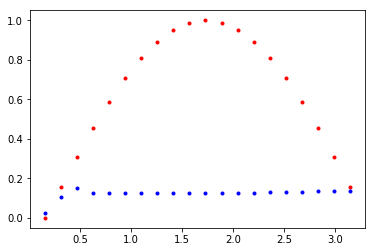

Loss:  0.22931069135665894


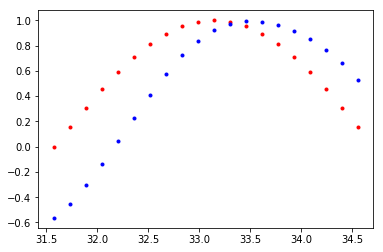

Loss:  0.013975103385746479


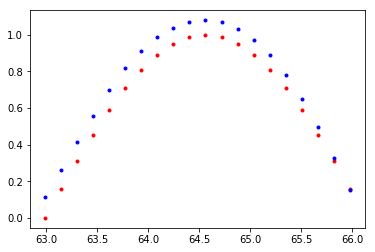

Loss:  0.004276913590729237


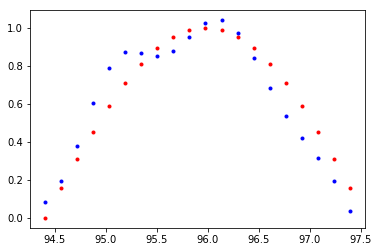

Loss:  0.008203621953725815


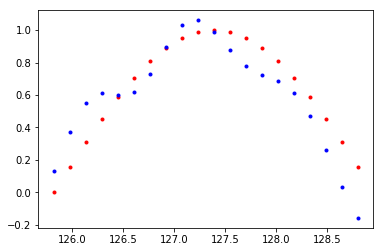

Loss:  0.0014541891869157553


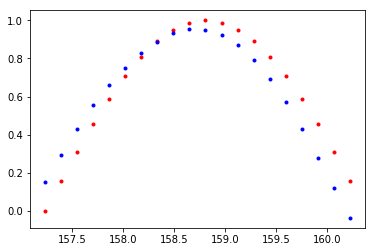

Loss:  0.0008243599440902472


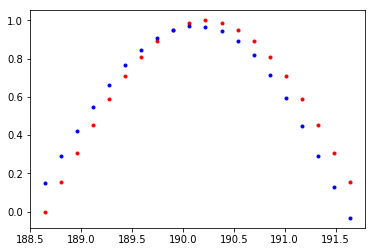

Loss:  0.0004472817527130246


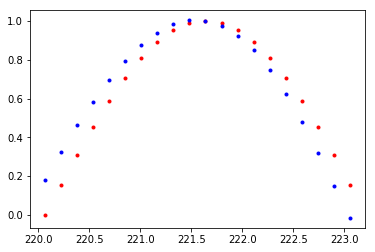

Loss:  0.0003942176990676671


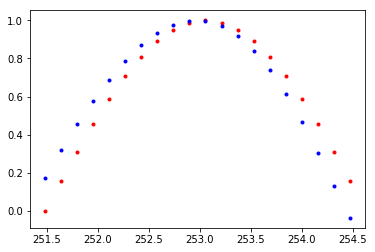

Loss:  0.00041754372068680823


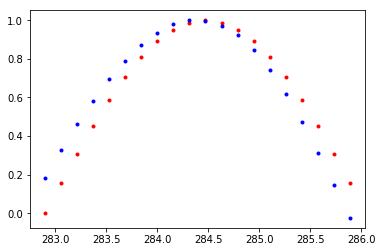

In [37]:
train()